### Task 4.3 Supervised Learning - Regression and hyperparameter tuning

- Load dataset
  - Use Blood-Brain Barrier dataset (see also caret datasets). Try to understand the research question.
- Split the dataset
  - Use `train_test_split()` to create 75% training and 25% test sets.
- Select a learning method
  - Use `RandomForestRegressor` from `sklearn.ensemble`.
  - Apply preprocessing (scaling/centering) if needed.
- (Optional) Define a tuning grid
  - Use `GridSearchCV` to tune hyperparameters (e.g., `n_estimators`, `max_depth`, `mtry`).
- Perform 10-fold cross-validation
  - Use `cross_val_score` or define `cv=10` inside `GridSearchCV`.
- Analyze performance values
  - Print model performance metrics and feature importances (`model.feature_importances_`).
- Apply the final model to the test set
  - Use `predict()` to make predictions on the test data.
  - Evaluate performance using `mean_squared_error`, `r2_score`, or similar metrics.
  - If preprocessing was used, apply the same transformation to the test set before prediction.

### Explanation of the dataset
The Blood-Brain Barrier (BBB) is a physiological boundary that restricts the passage of substances from the bloodstream into the brain. In drug discovery, it is critical to know whether a compound can cross the BBB.

- The dataset contains physicochemical properties of molecules as features (descriptors).
- The target variable is logBBB and it inidcates th permeability of each compound.
    - high logBBB = molecule likely to cross the barrier
    - low logBBB = molecule less likely to coss the barrier and penetrate the brain

### Code

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [6]:
data = pd.read_csv("./assets/BloodBrain.csv")
data

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3,logBBB
0,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000,1.08
1,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499,-0.40
2,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099,0.22
3,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600,0.14
4,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,32.700001,1,0,233.69200,6,250.362,51.28292,109.50990,13.19232,0.000000,...,1,3,0.8717,0.8717,0.3333,0.000000,3.1150,0.000000,49.692799,-0.02
204,3.240000,0,0,343.24290,10,292.446,40.59702,104.67720,13.19232,0.000000,...,0,1,0.0000,0.0000,0.0000,0.000000,4.6658,0.000000,0.000000,0.08
205,32.340000,1,0,234.79200,6,261.389,75.11627,86.66676,0.00000,8.619013,...,1,2,1.2276,1.2276,0.5000,0.000000,16.1765,54.358601,0.000000,0.25
206,37.299999,0,0,124.25940,0,143.206,63.98079,14.70850,0.00000,0.000000,...,1,2,0.9082,0.9082,0.5000,0.000000,0.0000,30.101400,15.944600,-0.84


We define the features `X` and the target `y` and divide the dataset into test and train parts.

In [8]:
X = data.drop(columns='logBBB')
y = data['logBBB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("train dataset shape:", X_train.shape)
print("test dataset shape:", X_test.shape)

train dataset shape: (156, 134)
test dataset shape: (52, 134)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

In [37]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)


best_rf_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [28]:
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=10, scoring='r2')

print("CV R² scores:", cv_scores)
print(f"Mean R²: {cv_scores.mean():.3f}, Std: {cv_scores.std():.3f}")

CV R² scores: [0.58012335 0.27991372 0.6863204  0.63616341 0.57545527 0.7122683
 0.6507631  0.60175096 0.58704458 0.49337574]
Mean R²: 0.580, Std: 0.116


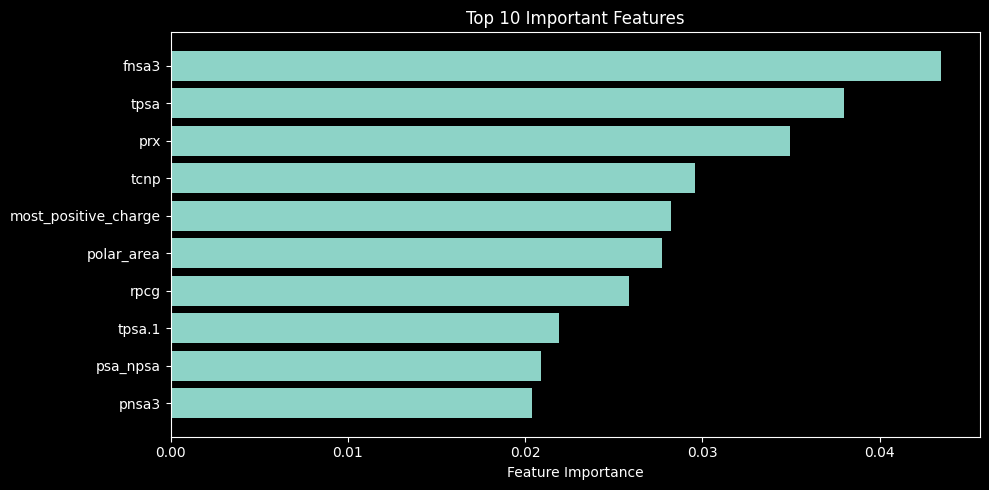

In [31]:
importances = best_rf_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1][:10]  # top 10
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices][::-1], importances[indices][::-1])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [36]:
y_pred = best_rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2: ", r2)

MSE: 0.2541175855288462
R^2:  0.3921436468747588
